# More Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
prof = pd.read_csv('prof_stats.csv', index_col=0)
prof = prof.loc[prof['dept_group'] != 'UNDEFINED']
prof.head()

,INSTITUTION NAME,AGE,INITIAL HIRE DATE,EMPLOYEE ANNUAL BASE SALARY,PRIMARY WORKING TITLE,dept,dept_group,updated,empl_len,school,oos_tuition,is_tuition,profs,enrollment,acceptance,sp_ratio
0,ASU,70,1998-08-01,27000.0,Adjunct Professor,Library Sciences,Humanities,2022-06-30,8734,Appalachian State University,23557,7950,943,20023,0.8,21.233298
1,ASU,64,1998-08-24,24736.0,Adjunct Professor,Library Sciences,Humanities,2022-06-30,8711,Appalachian State University,23557,7950,943,20023,0.8,21.233298
2,ASU,42,2004-12-01,40000.0,Lecturer,Languages/Literature,Humanities,2022-06-30,6420,Appalachian State University,23557,7950,943,20023,0.8,21.233298
3,ASU,42,2021-08-01,68000.0,Assistant Professor,Design,Art/Design,2022-06-30,333,Appalachian State University,23557,7950,943,20023,0.8,21.233298
4,ASU,38,2011-08-26,77086.0,Associate Professor,Psychology,Humanities,2022-06-30,3961,Appalachian State University,23557,7950,943,20023,0.8,21.233298


In [3]:
# Make a column for tenure track vs not
tenure = ['Distinguished Professor', 'Professor', 'Assistant Professor', 'Associate Professor']
prof['tenure_track'] = [1 if p in tenure else 0 for p in prof['PRIMARY WORKING TITLE']]

In [4]:
prof['EMPLOYEE ANNUAL BASE SALARY'].median()

85027.0

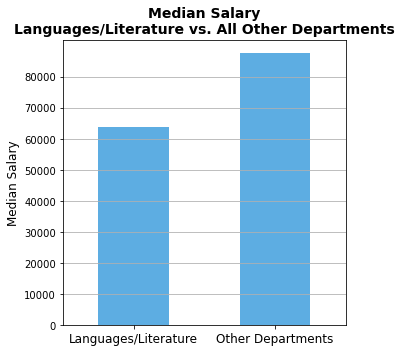

In [5]:
# Showing Median of Languages/Literature versus the median of other depts
lang = prof.loc[prof['dept'] == 'Languages/Literature'][
    'EMPLOYEE ANNUAL BASE SALARY'].median()
other = prof.loc[prof['dept'] != 'Languages/Literature'][
    'EMPLOYEE ANNUAL BASE SALARY'].median()
df = pd.DataFrame([lang, other], index=['Languages/Literature', 'Other Departments'])

ax = df.plot.bar(figsize=(5, 5), legend=False,
                 color=(93/255, 173/255, 226/255))

ax.set_title('Median Salary\nLanguages/Literature vs. All Other Departments',
            fontsize=14, fontweight='bold')
ax.set_ylabel('Median Salary', fontsize=12)

ax.set_yticks(ticks=np.arange(0, 90_000, 10_000))
ax.grid(axis='y', alpha=1)

plt.xticks(fontsize=12, rotation=0)


plt.tight_layout()
plt.show()


In [6]:
lang, other

(63731.5, 87577.5)

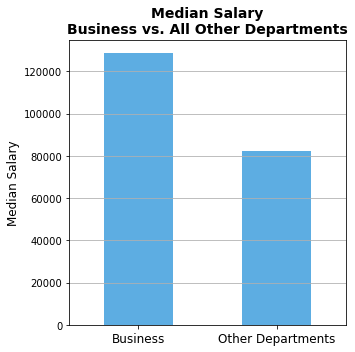

In [7]:
# Showing Median of Business dept_group vs other dept_groups
bus = prof.loc[prof['dept_group'] == 'Business'][
    'EMPLOYEE ANNUAL BASE SALARY'].median()
other = prof.loc[prof['dept_group'] != 'Business'][
    'EMPLOYEE ANNUAL BASE SALARY'].median()

df = pd.DataFrame([bus, other], index=['Business', 'Other Departments'])
ax = df.plot.bar(figsize=(5, 5), legend=False,
                 color=(93/255, 173/255, 226/255))

ax.set_title('Median Salary\nBusiness vs. All Other Departments',
            fontsize=14, fontweight='bold')
ax.set_ylabel('Median Salary', fontsize=12)


ax.grid(axis='y', alpha=1)

plt.xticks(fontsize=12, rotation=0)


plt.tight_layout()
plt.show()

In [8]:
bus, other

(128575.0, 82193.0)

In [9]:
# Reorder 'dept' names, so that we drop Health Science/Nursing
prof['dept'] = prof['dept'].astype('category')
dept_names = prof['dept'].unique().to_list()
dept_names.remove('Health Science/Nursing')
dept_names.insert(0, 'Health Science/Nursing')
prof['dept'] = prof['dept'].cat.reorder_categories(dept_names, ordered=False)

# Reorder 'INSTITUTION' names so that we drop NCCU
prof['INSTITUTION NAME'] = prof['INSTITUTION NAME'].astype('category')
ins_names = prof['INSTITUTION NAME'].unique().to_list()
ins_names.remove('NCCU')
ins_names.insert(0, 'NCCU')
prof['INSTITUTION NAME'] = prof['INSTITUTION NAME'].cat.reorder_categories(ins_names, ordered=False)

# Linear Regression for each Department
predictors = ['dept', 'INSTITUTION NAME']

X = pd.get_dummies(prof[predictors], drop_first=True)
y = prof['EMPLOYEE ANNUAL BASE SALARY']
dept_model = LinearRegression()
dept_model.fit(X, y)
dept_model.intercept_

84230.07407093406

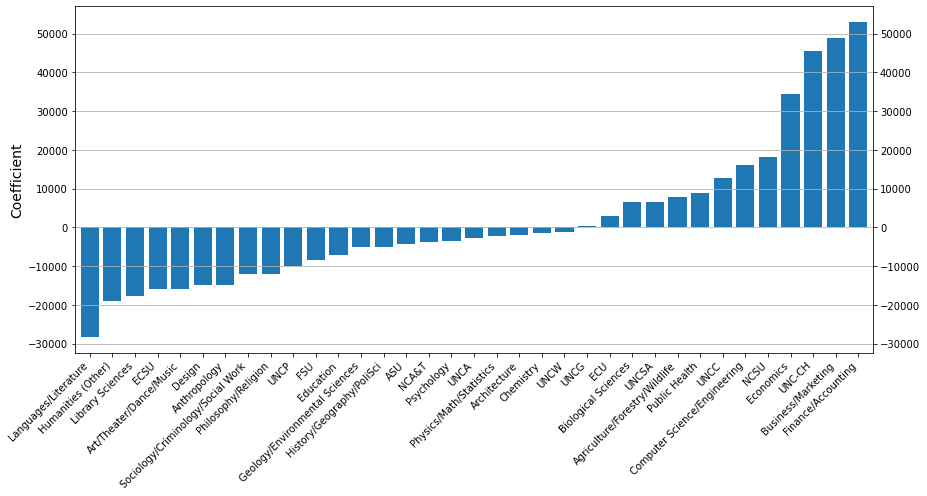

In [10]:
dept_coef = pd.DataFrame([c for c in dept_model.coef_], index = [n for n in X.columns])
dept_coef = dept_coef.sort_values(by=0)
dept_coef.index = dept_coef.index.str.replace(r'dept_', '')
dept_coef.index = dept_coef.index.str.replace(r'INSTITUTION NAME_', '')

ax = dept_coef.plot.bar(figsize=(13,7), legend=False, width=.8)
ax.set_ylabel('Coefficient', fontsize=14, fontstretch=1000)
ax.grid(axis='y')
ax.tick_params(axis='y', right=True, labelright=True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# Seperate Regression Tests for Tenure and Non-Tenure Track Positions
yesten = prof.loc[prof['tenure_track'] == 1]
noten = prof.loc[prof['tenure_track'] == 0]

predictors = ['dept']

Xyes = pd.get_dummies(yesten[predictors], drop_first=True)
yyes = yesten['EMPLOYEE ANNUAL BASE SALARY']
Xno = pd.get_dummies(noten[predictors], drop_first=True)
yno = noten['EMPLOYEE ANNUAL BASE SALARY']

yesmodel, nomodel = LinearRegression(), LinearRegression()
yesmodel.fit(Xyes, yyes)
nomodel.fit(Xno, yno)
yesmodel.intercept_, nomodel.intercept_

(99239.879399249, 63041.05504587156)

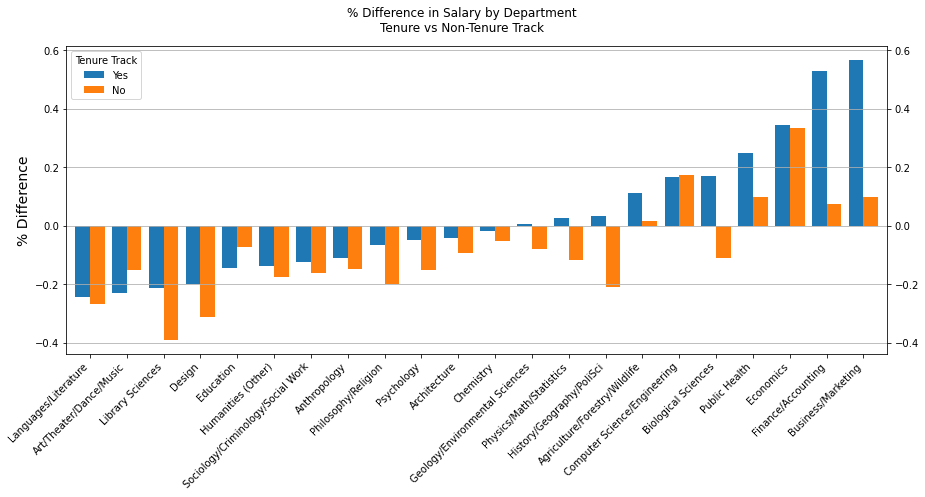

In [18]:
yesno = pd.DataFrame({
    'Yes': [y/yesmodel.intercept_ for y in yesmodel.coef_],
    'No': [n/nomodel.intercept_ for n in nomodel.coef_]},
    index=[name for name in Xyes.columns])
yesno = yesno.sort_values(by='Yes')

yesno.index = yesno.index.str.replace(r'dept_', '')

ax = yesno.plot.bar(figsize=(13,7), width=0.8)
ax.legend(title='Tenure Track')
ax.grid(axis='y')
ax.tick_params(axis='y', right=True, labelright='True')
ax.set_ylabel('% Difference', fontsize=14, fontstretch=1000)
plt.xticks(rotation=45, ha='right')
plt.suptitle(
    '% Difference in Salary by Department\nTenure vs Non-Tenure Track')

plt.tight_layout()
plt.show()
#plt.savefig('pct-diff-ten-dept.png')